In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

sns.set_theme(style='whitegrid', palette='pastel')

# Sentiment

Positive, Neutral and Negative sentiment overall and across different topics.

[Text(0, 0.5, 'Percentage (%)'), Text(0.5, 0, 'Sentiment')]

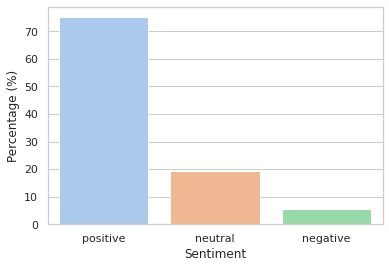

In [20]:
stats_path = '../test_stats.json'

with open(stats_path, 'r') as f:
    data = json.load(f)

overall = data['overall']

sentiments_names = {
    'p': 'positive',
    'o': 'neutral',
    'n': 'negative'
}

count = 0
for key, value in overall['sentiments'].items():
    count += value

sentiments = pd.DataFrame({
    'sentiment': [sentiments_names[k] for k in overall['sentiments'].keys()],
    'percentage': [v/count * 100 for v in overall['sentiments'].values()]
})

ax = sns.barplot(x='sentiment', y='percentage', data=sentiments)
ax.set(ylabel='Percentage (%)', xlabel='Sentiment')


In [24]:
by_topic = data['by_topic']

topics_names = {
    'rev': 'review',
    'act': 'acting',
    'media': 'media',
    'not_watched': 'not watched',
    'sce': 'scene',
    'ad': 'advertisement',
    'ten': 'tennis'
}

by_topic_values = []
for t in topics_names:
    total = sum(by_topic[t].values())
    if len(by_topic[t].values())==3:
        by_topic_values.extend([v/total for v in by_topic[t].values()])
    else:
        for k in sentiments_names.keys():
            by_topic_values.append(by_topic[t].get(k, 0)/total)

sentiments_by_topic = pd.DataFrame({
    'topic': [topics_names[k] for k in by_topic.keys() for _ in range(3)],
    'sentiment': [sentiments_names[v] for _ in range(7) for v in by_topic['rev'].keys() ],
    'proportion': by_topic_values
})

sentiments_by_topic

,topic,sentiment,proportion
0,review,positive,0.854772
1,review,neutral,0.097510
2,review,negative,0.047718
3,acting,positive,0.880000
4,acting,neutral,0.102857
5,acting,negative,0.017143
6,media,positive,0.475309
7,media,neutral,0.395062
8,media,negative,0.129630
9,not watched,positive,0.661972


[Text(0.5, 0, 'Percentage of sentiments within each topic (%)'),
 Text(0, 0.5, 'Topic')]

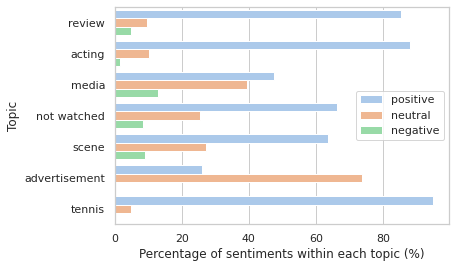

In [30]:
# Multiple x values by 100 to get percentages
copy_of_data = sentiments_by_topic.copy()
copy_of_data['proportion'] = copy_of_data['proportion'] * 100 

ax = sns.barplot(x='proportion', y='topic', hue='sentiment', data=copy_of_data)

ax.legend(loc=7, frameon=True)
ax.set(xlabel='Percentage of sentiments within each topic (%)', ylabel='Topic')

King Richard gets high praise in general and in acting. It receives the most negative sentiment though media, with 12.8% of all media tweets being negative.

# Topics

Distribution of topics 

[Text(0.5, 0, 'Percentage (%)'), Text(0, 0.5, 'Topic')]

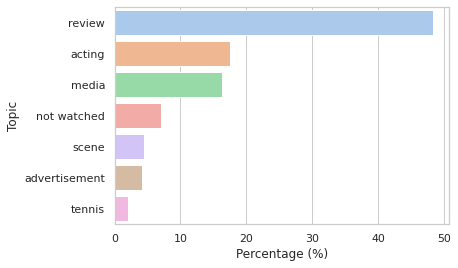

In [35]:
count = 0
for key, value in overall['topics'].items():
    count += value

overall_topics = pd.DataFrame({
    'topic': [topics_names[k] for k in overall['topics'].keys()],
    'proportion': [v/count * 100 for v in overall['topics'].values()]
})

ax = sns.barplot(x='proportion', y='topic', data=overall_topics)
ax.set(xlabel='Percentage (%)', ylabel='Topic')

The reviews make up nearly half of the entire dataset. This category was most likely inflated from the short, generic tweets about King Richard such as "I liked King Richard!" with no other explanation.

# TF-IDF scores

Ranked for each topic.

In [36]:
tf_idf_data_path = '../test_tf_idf.json'

with open(tf_idf_data_path, 'r') as f:
    tf_idf_data = json.load(f)

df_data = {
    'topic': [topics_names[k] for k in tf_idf_data.keys()],
    'words': [[w[0] for w in sorted(v.items(), key=lambda x: x[1], reverse=True)[:10]] for v in tf_idf_data.values()]
}

df_topics = pd.DataFrame(df_data)
df_topics

FileNotFoundError: [Errno 2] No such file or directory: '../test_tf_idf.json'

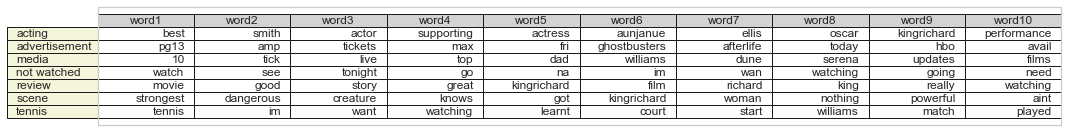

In [ ]:
fig, ax = plt.subplots(figsize=(15, 2))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.patch.set_visible(False)

ax.table(
    cellText=df_topics['words'],
    rowLabels=df_topics['topic'],
    colLabels=[f'word{i+1}' for i in range(10)],
    colColours=np.full(10, 'lightgray'),
    rowColours=np.full(7, 'beige'),
    loc='center')
fig.tight_layout()

Don't use this table for the actual report, writing the table directly with Latex is better.